In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [40]:
x,y = load_diabetes(return_X_y=True)

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [15]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
x_norm = scale.fit_transform(x) 

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,random_state=0,test_size=0.2)

In [34]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [38]:
y_pred = dtr.predict(x_test)

In [48]:
score = dtr.score(x_test,y_test)
dtr.feature_importances_

array([0.0404835 , 0.01598173, 0.22478825, 0.08957102, 0.03585074,
       0.06213207, 0.06600243, 0.02337745, 0.39045192, 0.05136089])

In [47]:
data,target = load_diabetes(as_frame=True , return_X_y=True)
df = pd.concat([data,target], axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


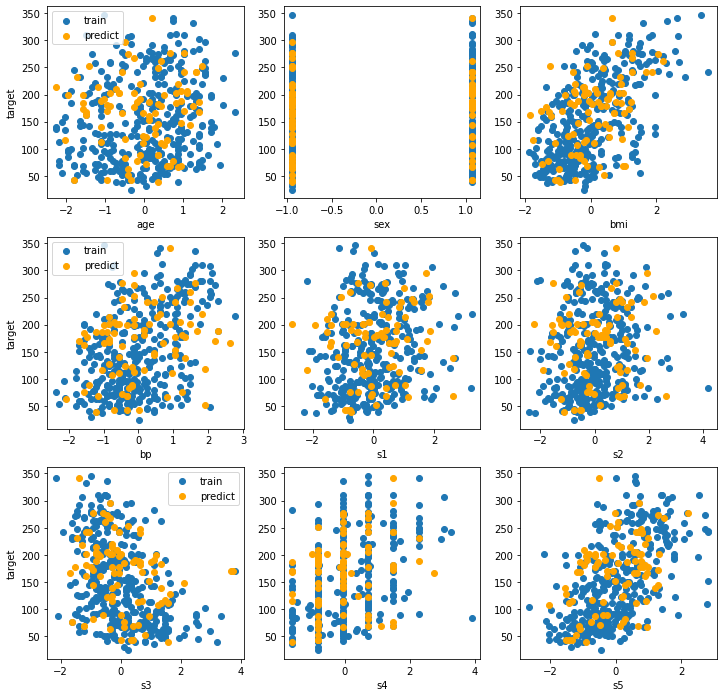

In [68]:
x_features = df.columns[:-1]
x_features
fig,ax = plt.subplots(3,3,figsize=(12,12))
k=0
for i in range(ax.shape[0]):
    for j in range (ax.shape[1]):
        ax[i][j].set_xlabel(x_features[k])
        ax[i][j].scatter(x_train[:,k],y_train, label = 'train')
        ax[i][j].scatter(x_test[:,k],y_pred,color='orange', label = 'predict')
        ax[i][0].set_ylabel("target");
        ax[i][0].legend();
        k+=1